In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import numpy as np
import os
import gzip

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split
# 注意housing本身的转变 以及train_test_split参数设置
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [25]:
# 多输入
# 多输出
# 固定模型以及训练模型的时候输入输出要匹配
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_wide, hidden2])
output1 = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output1, output2])
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 30)           210         input_32[0][0]                   
__________________________________________________________________________________________________
input_31 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 30)           930         dense_47[0][0]                   
____________________________________________________________________________________________

In [33]:
# 给不同输入分配属性
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

# 这里同一个y_test也要写两次 
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train],
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                    epochs=10)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.7269 - dense_49_loss: 0.3366 - dense_50_loss: 0.3907 - val_loss: 0.7437 - val_dense_49_loss: 0.3447 - val_dense_50_loss: 0.3989
Epoch 2/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.7182 - dense_49_loss: 0.3339 - dense_50_loss: 0.3843 - val_loss: 0.7282 - val_dense_49_loss: 0.3399 - val_dense_50_loss: 0.3882
Epoch 3/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7173 - dense_49_loss: 0.3338 - dense_50_loss: 0.3834 - val_loss: 0.7285 - val_dense_49_loss: 0.3374 - val_dense_50_loss: 0.3909
Epoch 4/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.7005 - dense_49_loss: 0.3241 - dense_50_loss: 0.3764 - val_loss: 0.7383 - val_dense_49_loss: 0.3386 - val_dense_50_loss: 0.3997
Epoch 5/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6941 - dense_49_loss: 0.

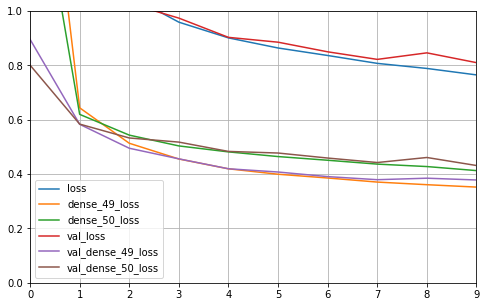

In [32]:
def draw_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid()
    plt.ylim(0, 1)
    plt.show()
draw_learning_curve(history)

In [29]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7876993818800578, 0.3699899, 0.41977718]